In [2]:
import csv
import pandas as pd
import pymysql
import sqlite3
data = pd.read_csv('C:/Users/11/Desktop/분할/complaint_after1.csv', low_memory=False)
travel = csv.reader(data)
next(travel)

conn = pymysql.connect(host='127.0.0.1', port=3307,user='root',password='0000',db='project',charset='utf8')
cur = conn.cursor()

In [2]:
import pymysql
import pandas as pd
# MySQL 연결 설정
conn = pymysql.connect(host='localhost', port=3306, user='root', password='0000', db='project', charset='utf8')
cur = conn.cursor()

query = "SELECT * FROM project.complaints"
df = pd.read_sql_query(query,conn)
conn.close()

C:\Users\11\AppData\Local\Temp\ipykernel_7356\3598606560.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from collections import Counter
custom_words = ['XXXX']
stop_words = set(stopwords.words('english'))
all_stop = stop_words.union(custom_words)

words = [word for complaint in df['Consumer_complaint_narrative'].
         fillna('') for word in word_tokenize(complaint) 
         if word.isalpha() and word.lower() not in all_stop]
word_count = Counter(words)
print(word_count)

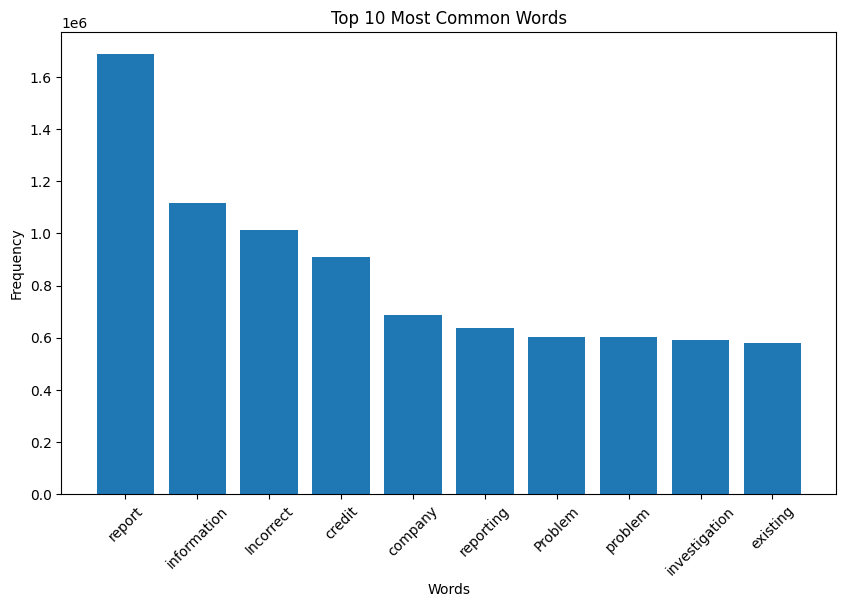

In [34]:
import matplotlib.pyplot as plt

# 가장 빈도가 높은 상위 20개 단어 추출
top_words = word_count.most_common(11)[1:]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_words)), [count for word, count in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, count in top_words], rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()